In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#taget column = Personal Loan

In [5]:
#to check null value 
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
#dropping the unnecessary columns
df=df.drop('ID',axis=1)

In [7]:
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


In [9]:
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
#experience field minimum value is negative which can't be true

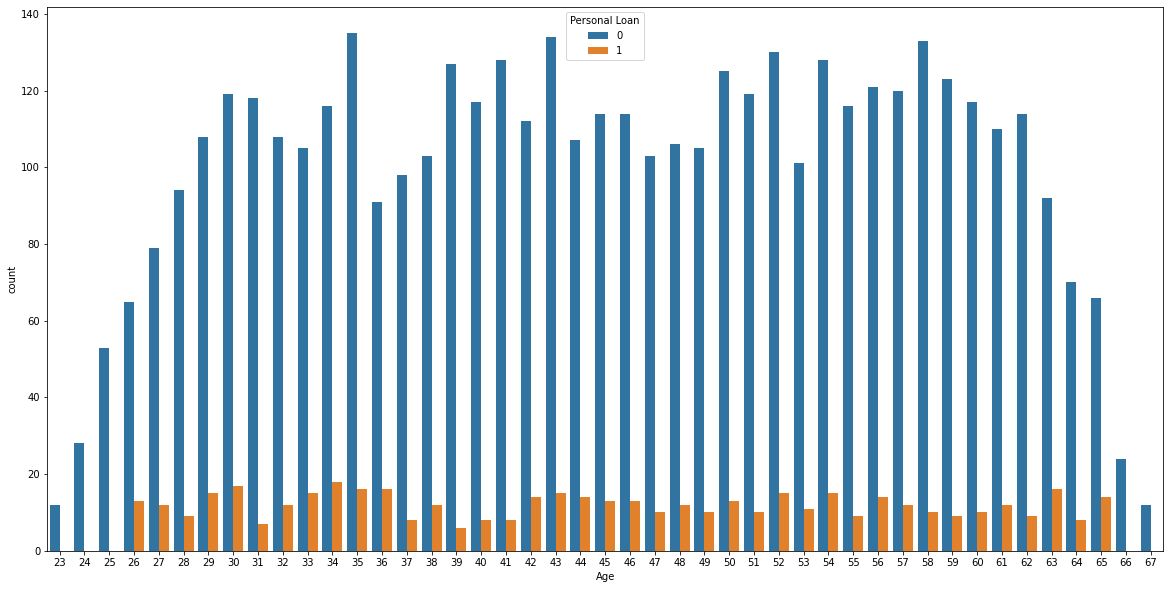

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(data=df,x='Age', hue='Personal Loan')
plt.show()

In [12]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [13]:
#we can see here very few percentage of people got into the process of getting the personal loan

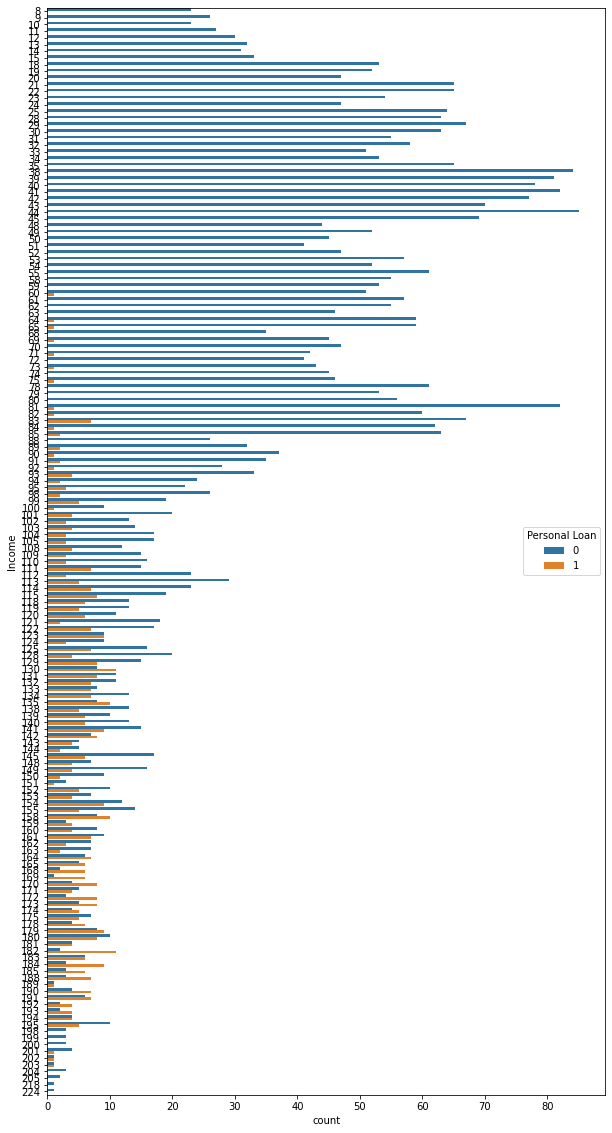

In [14]:
plt.figure(figsize=(10,20))
sns.countplot(data=df,y='Income', hue='Personal Loan')
plt.show()

In [15]:
#we can see here "people with mid-lower to mid-higher income are taking rhe loans"

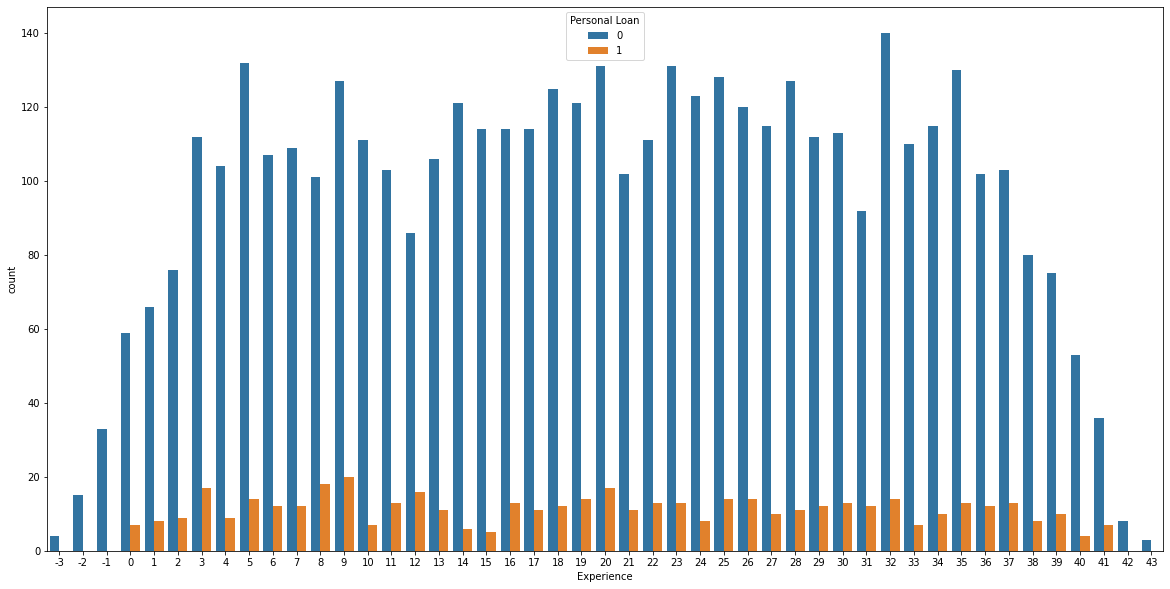

In [16]:
plt.figure(figsize=(20,10))
sns.countplot(data=df, x='Experience', hue='Personal Loan' )
plt.show()

In [17]:
#same as that of income vs personal loan

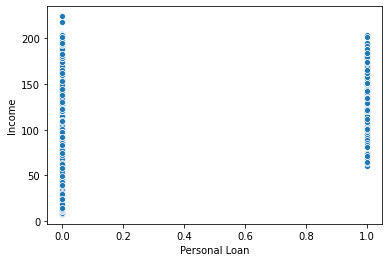

In [18]:
sns.scatterplot(data=df,x='Personal Loan',y='Income')
plt.show()

In [19]:
pd.value_counts(df['Personal Loan'])

0    4520
1     480
Name: Personal Loan, dtype: int64

In [20]:
X=df.drop(['Personal Loan'],axis=1)
Y=df['Personal Loan']

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
from sklearn.metrics import classification_report

In [25]:
#creating the function
def create_model(model):
    model.fit(X_train,Y_train) #we train the model
    y_pred=model.predict(X_test)  #test the model
    print(classification_report(Y_test,y_pred))
    return model

In [26]:
#create the object of LogisticRegression class
lr=LogisticRegression()

In [27]:
#calling function
create_model(lr)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1351
           1       0.57      0.30      0.39       149

    accuracy                           0.91      1500
   macro avg       0.75      0.64      0.67      1500
weighted avg       0.89      0.91      0.89      1500



LogisticRegression()

In [28]:
#logistic regression gives a bad accuracy score of 0.30.

In [29]:
#model is overfit
#we use DecisionTreeClassfier algorithm(it is select the important feature)

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
#creating the object of DecisionTreeClassifier class
dt1=DecisionTreeClassifier()

In [32]:
#calling function
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.90      0.88      0.89       149

    accuracy                           0.98      1500
   macro avg       0.95      0.93      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [33]:
dt1.feature_importances_

array([0.02652052, 0.01638662, 0.30952816, 0.        , 0.16617662,
       0.04663199, 0.40368987, 0.00479397, 0.        , 0.02571145,
       0.00056079, 0.        ])

In [34]:
X.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [35]:
#we can see here which columns is important or which one is not

In [36]:
#using pruning technique
dt2=DecisionTreeClassifier(max_depth=5)

In [37]:
#calling function
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1351
           1       0.91      0.89      0.90       149

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.94      1500
weighted avg       0.98      0.98      0.98      1500



In [38]:
dt2.feature_importances_

array([0.00708304, 0.00597692, 0.32552351, 0.        , 0.15649363,
       0.04131269, 0.43881611, 0.        , 0.        , 0.0247941 ,
       0.        , 0.        ])

In [39]:
X.columns

Index(['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online',
       'CreditCard'],
      dtype='object')

In [40]:
#with the help of pruning technique we removed the overfitting situation

In [41]:
#DecisionTreeClassifier gives a very good accuracy score of 0.88, again will go another alogrith

In [42]:
#now will go with the SVM

In [43]:
from sklearn.svm import LinearSVC, SVC

In [44]:
#create object of LinearSVC class
svc=LinearSVC(random_state=1)

In [45]:
#call function
create_model(svc)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



LinearSVC(random_state=1)

In [46]:
#we add some error on training time (to reduce overfit model)

In [47]:
svc1=LinearSVC(random_state=1,C=6)

In [48]:
create_model(svc1)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



LinearSVC(C=6, random_state=1)

In [49]:
#create the object of SVC class
poly_svc=SVC(random_state=1,kernel="poly",degree=4)

In [50]:
#call function
create_model(poly_svc)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



SVC(degree=4, kernel='poly', random_state=1)

In [51]:
r_svc=SVC(random_state=1,kernel="rbf")

In [52]:
#call function
create_model(r_svc)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1351
           1       0.00      0.00      0.00       149

    accuracy                           0.90      1500
   macro avg       0.45      0.50      0.47      1500
weighted avg       0.81      0.90      0.85      1500



SVC(random_state=1)

In [53]:
'''1. Linear Kernel (use linear distributed data)
2. polynomial kernel (non-linearly)
3. radial basis kernel (non-linearly)'''
#using of this three algorithm we got the 0 score.
# SVM gives overfitting result so will not consider it.

'1. Linear Kernel (use linear distributed data)\n2. polynomial kernel (non-linearly)\n3. radial basis kernel (non-linearly)'

In [54]:
#now we will check random forest classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf=RandomForestClassifier(n_estimators=200,max_depth=10)

In [57]:
create_model(rf)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.98      0.84      0.90       149

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



RandomForestClassifier(max_depth=10, n_estimators=200)

In [58]:
# roandom forest classifier gives overfitting result so will not consider it 

In [59]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [60]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=100)

In [61]:
#call function
create_model(gbc)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1351
           1       0.96      0.86      0.90       149

    accuracy                           0.98      1500
   macro avg       0.97      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500



GradientBoostingClassifier()

In [62]:
#create of of AdaBoostClassifier class
ada=AdaBoostClassifier()

In [63]:
#call function
create_model(ada)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.92      0.70      0.80       149

    accuracy                           0.96      1500
   macro avg       0.94      0.85      0.89      1500
weighted avg       0.96      0.96      0.96      1500



AdaBoostClassifier()

In [64]:
#data Imbalance: to solve this problem we use sampling technique

In [65]:
df["Personal Loan"].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

In [66]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [67]:
#create object of RandomOverSampler() class
ros=RandomOverSampler()

In [68]:
X_sample1,Y_sample1=ros.fit_sample(X_train,Y_train)

In [69]:
pd.Series(Y_train).value_counts()

0    3169
1     331
Name: Personal Loan, dtype: int64

In [70]:
pd.Series(Y_sample1).value_counts()

1    3169
0    3169
Name: Personal Loan, dtype: int64

In [71]:
#after sampling we use DecisionTreeClassifier
dt3=DecisionTreeClassifier(max_depth=3) #use pruning technique

In [72]:
dt3.fit(X_sample1,Y_sample1) #we train model

DecisionTreeClassifier(max_depth=3)

In [73]:
pd.Series(Y_test).value_counts()

0    1351
1     149
Name: Personal Loan, dtype: int64

In [74]:
X_sample_test,Y_sample_test=ros.fit_sample(X_test,Y_test)

In [75]:
pd.Series(Y_sample_test).value_counts()

1    1351
0    1351
Name: Personal Loan, dtype: int64

In [76]:
y_pred=dt3.predict(X_sample_test)  #test the model

In [77]:
print(classification_report(Y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1351
           1       0.93      0.96      0.95      1351

    accuracy                           0.95      2702
   macro avg       0.95      0.95      0.95      2702
weighted avg       0.95      0.95      0.95      2702



In [78]:
#GrandientBoosting use on random over sampler
gbc1=GradientBoostingClassifier(n_estimators=100)

In [79]:
gbc1.fit(X_sample1,Y_sample1) #we train model

GradientBoostingClassifier()

In [80]:
y_pred=gbc1.predict(X_sample_test)   #we test the model

In [81]:
print(classification_report(Y_sample_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1351
           1       0.99      0.95      0.97      1351

    accuracy                           0.97      2702
   macro avg       0.97      0.97      0.97      2702
weighted avg       0.97      0.97      0.97      2702



In [82]:
#create object of RandomUnderSampler() class
rus=RandomUnderSampler()

In [83]:
pd.Series(Y_train).value_counts()

0    3169
1     331
Name: Personal Loan, dtype: int64

In [84]:
X_sample2,Y_sample2=rus.fit_sample(X_train,Y_train)

In [85]:
pd.Series(Y_sample2).value_counts()

1    331
0    331
Name: Personal Loan, dtype: int64

In [86]:
X_sample_test2,Y_sample_test2=rus.fit_sample(X_test,Y_test)

In [87]:
pd.Series(Y_sample_test2).value_counts()

1    149
0    149
Name: Personal Loan, dtype: int64

In [88]:
#after under sampling we use DecisionTreeClassifier
dt4=DecisionTreeClassifier(max_depth=3)

In [89]:
dt4.fit(X_sample2,Y_sample2) #We train the model

DecisionTreeClassifier(max_depth=3)

In [90]:
y_pred=dt4.predict(X_sample_test2)  #test the model

In [91]:
print(classification_report(Y_sample_test2,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       149
           1       0.94      0.93      0.94       149

    accuracy                           0.94       298
   macro avg       0.94      0.94      0.94       298
weighted avg       0.94      0.94      0.94       298



In [92]:
#GrandientBoosting use on random under sampler
gbc2=GradientBoostingClassifier(n_estimators=100)

In [93]:
gbc2.fit(X_sample2,Y_sample2) #train the model

GradientBoostingClassifier()

In [94]:
y_pred=gbc2.predict(X_sample_test2) #test the model

In [95]:
print(classification_report(Y_sample_test2,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       149
           1       0.97      0.95      0.96       149

    accuracy                           0.96       298
   macro avg       0.96      0.96      0.96       298
weighted avg       0.96      0.96      0.96       298

